In [2]:
from google.colab import drive
#drive.mount('/content/drive')

# **Substitution monoalphabétique - César**

Nous avons intercepté le messager de l’empereur. Il transmettait un message codé à son fils. Cela pourrait être un ordre de guerre ! A vous de le déchiffrer au plus vite. \\

Pour valider, il faudra entrer la concaténation des premières lettres de chaque ligne suivie de la concaténation des dernières lettres de chaque ligne (exemple avec le code :
**tfhqdlhfpkmeokgq**).

*tm bcsv qolfp \\
f'dmvd xuhm exl tgak \\
hlrkiv sydg hxm \\
qiswzzwf qrf oqdueqe \\
dpae resd wndo \\
liva bu vgtokx sjzk \\
hmb rqch fqwbg \\
fmmft seront sntsdr pmsecq* \\

Ecrire une fonction **plus_frequent(texte)** qui renvoie le caractére de l'alphabet le plus
frÈquent dans texte

In [ ]:
import numpy as np
def plus_frequent(text):
  n = len(text)
  max = 0
  count = np.zeros(26)
  for i in range(n):
    j = ord(text[i])-97
    if j<27:
      if j>=0:
        count[j]+=1

  for i in range(26):
    if count[i]>count[max]:
      max = i
  char = chr(max+97)
  return char

La lettre la plus frÈquente de la langue francaise est le ***e***. \\
 Nous allons supposer dans la suite
que le ***e*** est le caractére le plus fréquent du message qui a été codé. En cherchant la lettre la plus
fréquente dans le message codé, on peut revenir au message initial


Ecrire une fonction **decryptage(text)** qui, en supposant que code est le résultat du codage
de César, renvoie la chaine de caractére décodée. Cette fonction ne pourra s'appliquer avec
un résultat correct que lorsque, dans le message à coder, le caractére e est le plus fréquent, ce
qui est le cas dés que le message est suffisamment long

In [ ]:
def decryptage(text):
  freq = plus_frequent(text) #on récupère la lettre qui code un e
  decallage = 1 #calcul du décallage pour le code césar : e est la 4eme lettre si on défini a comme la lettre 0
  n = len(text)
  flag = ""
  for i in range(n):
    char = ord(text[i])
    if char == 32:
      decallage +=1
    if char == 39:
      decallage+=1
    if char>96:
      if char<123:
        letter = (char-97+decallage)%26
        flag += chr(letter+97)
      else:
        flag += text[i]
    else:
        flag += text[i]
  return flag


#Ouverture du fichier text.txt
fichier=open("text.txt")

#Lecture du fichier text.txt
fichier_r=fichier.read().splitlines()

#Mettre tous les string du text.txt sous un seul et meme string
n=len(fichier_r)
fichier_final=""
for i in range (0,n):
  fichier_final=fichier_final + fichier_r[i] + " "

decryptage(fichier_final)

FileNotFoundError: ignored

# **RSA - Factorisation**

Un message envoyé à une personne distincte a été intercepté.
 On dispose de la clefs publique de cette personnes.
 Retrouvez le message claire .

 *ciphertext :*
 ***e8oQDihsmkvjT3sZe+EE8lwNvBEsFegYF6+OOFOiR6gMtMZxxba/bIgLUD8pV3yEf0gOOfHuB5bC3vQmo7bE4PcIKfpFGZBA***





# **Rappels et notations**
soit $p$ et $q$ nombres entiers premiers entre eux

* $n = p.q $   (*n est appelé module*)
* $\phi(n)=(p-1)*(q-1)$

soit e premier avec $\phi(n)$ et e < $\phi(n)$ (*e est appelé exposant*)


On calcule  $d$ l’inverse de $e$ $\mod φ(N)$


**Le couple $(n, e)$** est **la clé publique**. Il est conçu pour être partagé avec tout le monde. Le nombre e est appelé **« exposant de clé publique »**. Il s'agit généralement de 65537 (0x010001). \\

**Le couple $(n, d)$** est **la clé privée**. Il est conçu pour être gardé secret. Il est pratiquement impossible de calculer la clé privée à partir de la clé publique .\\

Le nombre d est appelé **"exposant de clé privée"** (l'exposant secret). \\

Si message clair $M < n$ :

***Message chiffré*** :
 $$ C \equiv  M^{e}\mod{n} $$

***Message déchiffré***:
 $$ M \equiv  C^{d}\mod{n} $$

# **Principes**
On dispose du message chiffré $C$ et de la clé publique $(n, e)$ \\
On décompose $n$ en $p.q$ (*normalement impossible, c’est ce qui garantit la sécurité du chiffrement RSA*) \\

On calcul $\phi(n)=(p-1)*(q-1)$ \\
On calcule  $d$ l’inverse de *$e$ $\mod φ(N*)$ \\
On dispose alors de la clé privée $(n, d)$ \\
On  déchiffre $C$ avec la clé privée

In [3]:
!openssl help

Standard commands
asn1parse         ca                ciphers           cms               
crl               crl2pkcs7         dgst              dhparam           
dsa               dsaparam          ec                ecparam           
enc               engine            errstr            gendsa            
genpkey           genrsa            help              list              
nseq              ocsp              passwd            pkcs12            
pkcs7             pkcs8             pkey              pkeyparam         
pkeyutl           prime             rand              rehash            
req               rsa               rsautl            s_client          
s_server          s_time            sess_id           smime             
speed             spkac             srp               storeutl          
ts                verify            version           x509              

Message Digest commands (see the `dgst' command for more details)
blake2b512        blake2s256        gos

On utilise Openssl pour affichez les paramètres de notre clé public RSA avec la commande suivante :

In [35]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TP/TP_secu

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TP/TP_secu


In [36]:
!openssl rsa -in pubkey.pem -pubin -text -modulus

RSA Public-Key: (576 bit)
Modulus:
    00:c2:cb:b2:4f:db:f9:23:b6:12:68:e3:f1:1a:38:
    96:de:45:74:b3:ba:58:73:0c:bd:65:29:38:86:4e:
    22:23:ee:eb:70:4a:17:cf:d0:8d:16:b4:68:91:a6:
    14:74:75:99:39:c6:e4:9a:af:e7:f2:59:55:48:c7:
    4c:1d:7f:b8:d2:4c:d1:5c:b2:3b:4c:d0:a3
Exponent: 65537 (0x10001)
Modulus=C2CBB24FDBF923B61268E3F11A3896DE4574B3BA58730CBD652938864E2223EEEB704A17CFD08D16B46891A61474759939C6E49AAFE7F2595548C74C1D7FB8D24CD15CB23B4CD0A3
writing RSA key
-----BEGIN PUBLIC KEY-----
MGQwDQYJKoZIhvcNAQEBBQADUwAwUAJJAMLLsk/b+SO2Emjj8Ro4lt5FdLO6WHMM
vWUpOIZOIiPu63BKF8/QjRa0aJGmFHR1mTnG5Jqv5/JZVUjHTB1/uNJM0VyyO0zQ
owIDAQAB
-----END PUBLIC KEY-----


In [37]:
Modulus ="C2CBB24FDBF923B61268E3F11A3896DE4574B3BA58730CBD652938864E2223EEEB704A17CFD08D16B46891A61474759939C6E49AAFE7F2595548C74C1D7FB8D24CD15CB23B4CD0A3"
e= 65537


In [71]:
N=int(Modulus,16)
print(len(str(N)))
print('public key :', N ,e)

p = 398075086424064937397125500550386491199064362342526708406385189575946388957261768583317
q = 472772146107435302536223071973048224632914695302097116459852171130520711256363590397527
phi = (p-1)*(q-1)

def bezout_fct(a, b):
    x0, x1, y0, y1 = 0, 1, 1, 0

    while b != 0:
        q, a, b = a // b, b, a % b
        x0, x1 = x1 - q * x0, x0
        y0, y1 = y1 - q * y0, y0

    return x1, y1


d,useless = bezout_fct(e,phi)
e1 = d%(p-1)
e2 = d%(q-1)
coeff = (q**(-1))%p

print(' p:', p,'\n q:',q,'\n d:', d,'\n e1:', e1, '\n e2:', e2,'\n coeff',coeff)


174
public key : 188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650257059 65537
 p: 398075086424064937397125500550386491199064362342526708406385189575946388957261768583317 
 q: 472772146107435302536223071973048224632914695302097116459852171130520711256363590397527 
 d: 48318251158920145864930035723053089097690375168562443830554407970661009102774592695057202204701378327623682075089028698815133956650193819978456750305738325912711134934968241 
 e1: 316858949271369936436798279776484454581234898240081912060782303117610194643400177303161 
 e2: 414405125429722574873672438356405210984061180498409615212058346014677095058258126157381 
 coeff 2.1151838327056487e-87


Nous avons donc le pair **(N,e)**

# **Déterminer les facteurs p et q**


Wikipedia nous informe que lors d’un challenge, une clé publique de longueur N bits a été cassée
https://en.wikipedia.org/wiki/RSA_numbers

# **Construction  du  fichier de config OpenSSL**



Une façon de procéder consiste à générer une clé encodée en DER à l'aide de l'option -genconf de la commande asn1parse d'OpenSSL. \\

Vous aurez besoin de construire un fichier d'entrée pour asn1parse -genconf pour produire une clé RSA au format standard (per RFC 3447). La syntaxe pour asn1parse -genconf est donnée ici:http://www.openssl.org/docs/crypto/ASN1_generate_nconf.html et en effet, il a déjà un exemple pour construire une clé RSA.

Vous devez calculer quelques valeurs supplémentaires :
 $$ e1 \equiv  d\mod{p-1} $$
  $$ e2 \equiv  d\mod{q-1} $$
   $$ coof \equiv  q^{-1}\mod{p} $$

Mettez tout cela ensemble dans un fichier texte au format approprié


:

asn1=SEQUENCE:rsa_key \\
 \\
[rsa_key] \\
version=INTEGER:$0$ \\
modulus=INTEGER:$...$ \\
pubExp=INTEGER:$e$ \\
privExp=INTEGER:$d$ \\
p=INTEGER:$...$ \\
q=INTEGER:$...$ \\
e1=INTEGER:$...$ \\
e2=INTEGER:$...$ \\
coeff=INTEGER:$...$ \\


Pour construire le fichier binaire DER :




In [72]:
!openssl asn1parse -genconf config.txt -out newkey.der

    0:d=0  hl=4 l= 351 cons: SEQUENCE          
    4:d=1  hl=2 l=   1 prim: INTEGER           :00
    7:d=1  hl=2 l=  73 prim: INTEGER           :C2CBB24FDBF923B61268E3F11A3896DE4574B3BA58730CBD652938864E2223EEEB704A17CFD08D16B46891A61474759939C6E49AAFE7F2595548C74C1D7FB8D24CD15CB23B4CD0A3
   82:d=1  hl=2 l=   3 prim: INTEGER           :010001
   87:d=1  hl=2 l=  72 prim: INTEGER           :32030E42C69D4E77DE7E2397B13DBA2E52F2C57A205F5973FED6F87632F53CF8886609FF63FA114E2B5DF1DB6249F8EAF0BF5FA26AD5B8E48B7FAB050D32FC574B446E22D08BA7B1
  161:d=1  hl=2 l=  37 prim: INTEGER           :CCE95457F127C49546E57841029AC6AF70604C64E8281018ACBB538233BB57F37A6E6895
  200:d=1  hl=2 l=  37 prim: INTEGER           :F35CB825F003396F11F149A59A0FE73DB43162CB305B8EBFEDA5CA840BE24C536B6AAE57
  239:d=1  hl=2 l=  37 prim: INTEGER           :A31ADF3E1900F4A3760955CD398B85B7441602F9172A3C95C7785CA27917188CFFD93E79
  278:d=1  hl=2 l=  37 prim: INTEGER           :D55142C14E5F252AECC959CAE4FE67ADB893498BDDB983A94

Vous pouvez ensuite l'exécuter via la commande rsa d'OpenSSL pour confirmer :

In [73]:
!openssl rsa -in newkey.der -inform der -text -check

RSA Private-Key: (576 bit, 2 primes)
modulus:
    00:c2:cb:b2:4f:db:f9:23:b6:12:68:e3:f1:1a:38:
    96:de:45:74:b3:ba:58:73:0c:bd:65:29:38:86:4e:
    22:23:ee:eb:70:4a:17:cf:d0:8d:16:b4:68:91:a6:
    14:74:75:99:39:c6:e4:9a:af:e7:f2:59:55:48:c7:
    4c:1d:7f:b8:d2:4c:d1:5c:b2:3b:4c:d0:a3
publicExponent: 65537 (0x10001)
privateExponent:
    32:03:0e:42:c6:9d:4e:77:de:7e:23:97:b1:3d:ba:
    2e:52:f2:c5:7a:20:5f:59:73:fe:d6:f8:76:32:f5:
    3c:f8:88:66:09:ff:63:fa:11:4e:2b:5d:f1:db:62:
    49:f8:ea:f0:bf:5f:a2:6a:d5:b8:e4:8b:7f:ab:05:
    0d:32:fc:57:4b:44:6e:22:d0:8b:a7:b1
prime1:
    00:cc:e9:54:57:f1:27:c4:95:46:e5:78:41:02:9a:
    c6:af:70:60:4c:64:e8:28:10:18:ac:bb:53:82:33:
    bb:57:f3:7a:6e:68:95
prime2:
    00:f3:5c:b8:25:f0:03:39:6f:11:f1:49:a5:9a:0f:
    e7:3d:b4:31:62:cb:30:5b:8e:bf:ed:a5:ca:84:0b:
    e2:4c:53:6b:6a:ae:57
exponent1:
    00:a3:1a:df:3e:19:00:f4:a3:76:09:55:cd:39:8b:
    85:b7:44:16:02:f9:17:2a:3c:95:c7:78:5c:a2:79:
    17:18:8c:ff:d9:3e:79
exponent2:
    00:d5

Qui devrait afficher :


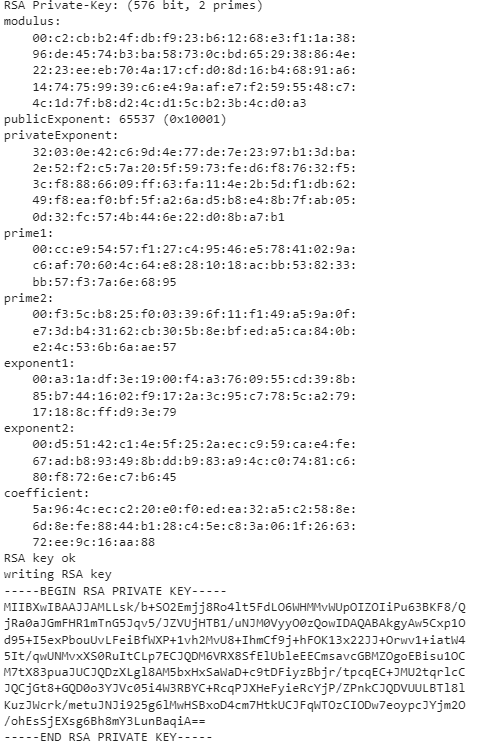

In [74]:
!cat config.txt

asn1=SEQUENCE:rsa_key

[rsa_key]
version=INTEGER:0
modulus=INTEGER:188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650257059
pubExp=INTEGER:65537
privExp=INTEGER:48318251158920145864930035723053089097690375168562443830554407970661009102774592695057202204701378327623682075089028698815133956650193819978456750305738325912711134934968241 
p=INTEGER:398075086424064937397125500550386491199064362342526708406385189575946388957261768583317
q=INTEGER:472772146107435302536223071973048224632914695302097116459852171130520711256363590397527
e1=INTEGER:316858949271369936436798279776484454581234898240081912060782303117610194643400177303161 
e2=INTEGER:414405125429722574873672438356405210984061180498409615212058346014677095058258126157381 
coeff=INTEGER:0x5a964cecc220e0f0edea32a5c2588e6d8efe8844b128c45ec83a061f266372ee9c16aa88

On convertit la clé du format DER en PEM :

In [75]:
! openssl rsa -inform der -in newkey.der -out privkey.pem

writing RSA key


On vérifié si la clé publique extraite de cette nouvelle clé privée concordait avec la clé publique fournie pour le challenge :

In [76]:
!openssl rsa -in privkey.pem -pubout > mykey.pub

writing RSA key


In [77]:
!sha1sum pubkey.pem mykey.pub

24ea1af85d9dfb43d07ed0f54d588a361b0ea854  pubkey.pem
24ea1af85d9dfb43d07ed0f54d588a361b0ea854  mykey.pub


Il ne reste plus qu’à déchiffrer

In [82]:
!more ciphertext.txt | base64 -d > ciphertextb64decode.txt

In [83]:
!openssl rsautl -decrypt -in ciphertextb64decode.txt -out plaintext.txt -inkey privkey.pem

Message décodé dans plaintext.txt = up2l6DnaIhZgxA


**resultat final** :   *up2....A*

# **RSA - Multiples destinataires**

Un message envoyé à 3 personnes distinctes a été intercepté. On dispose des clefs publiques de ces personnes. Retrouvez ce message.


#  **Théorème des restes chinois**
**Théorème** : Prenons
$m_{1}$
, ...,
$m_{n}$
 des entiers supérieurs à 2 deux à deux premiers entre eux, et
$a_{1}$
,
…
,
$a_{n}$
 des entiers. Le système d'équations :

$\left\{\begin{matrix}
 &  x \equiv a_{1} \mod{m_{1}} \\
 &  . ....  .  .   . . . \\
 &  x \equiv a_{n} \mod{m_{n}}
\end{matrix}\right.$ \\

admet une unique solution modulo
$M
=
m_{1}
×
⋯
m_{n}$
 donnée par la formule : \\

$ x
=
a_{1}
M_{1}
y_{1}
+
⋯
+
a_{n}
M_{n}
y_{n} \mod{M}$


où  $M_{i}=M/m_{i}$
et  $y_{i}$≡$M_{i}^{-1}$$\mod{m_{i}}$


pour
$i$
 compris entre
1
 et
$n$
.

In [84]:
pip install pkcs1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
pip install libnum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
pip install 'setuptools<58'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
pip install PyCrypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Nous allons utiliser les librairies **libnum (pour le théorème des restes chinois)**, **Crypto (pour lire le modulo des clés publiques)** et **pkcs1 (pour convertir le chiffré (string) en entier, afin de pouvoir effectuer des opérations arithmétiques dessus)**. \\

A noter que tous les fichiers du challenge doivent être dans le même dossier que le programme pour que ça marche, sinon il faudrait modifier les paths des fichiers dans le code.

In [93]:
!openssl rsa -in /content/drive/MyDrive/TP/TP_secu/partie_3/clef0_pub.pem -pubin -text -noout

RSA Public-Key: (2048 bit)
Modulus:
    00:be:d0:94:81:e6:c5:43:8d:ea:33:06:88:65:9f:
    b0:dd:a3:b9:34:92:4b:86:d5:22:f1:31:d4:1a:4f:
    dd:49:ca:06:63:46:ba:71:6d:2b:2a:e6:b0:aa:65:
    5e:a1:c7:2f:c7:86:72:53:2e:21:b4:ea:5e:26:8a:
    a3:21:b8:a3:1c:5f:fa:b1:a0:f7:e8:3b:c3:78:92:
    99:97:29:d9:ba:32:24:65:23:7f:cb:00:ac:68:3b:
    16:ca:9a:a4:0c:84:49:68:57:c6:01:8d:8f:c7:c5:
    8f:39:7d:06:56:e8:b6:c8:55:53:f9:a1:4f:61:96:
    5f:ec:e0:b8:5e:ee:e9:9b:81:28:bf:8b:4c:ff:e2:
    5b:e7:8a:4b:26:99:44:32:01:38:d4:5f:4a:16:c8:
    41:92:ab:58:95:fc:64:a4:f2:79:6a:87:23:4b:48:
    c4:6f:2d:f8:71:9f:28:ef:da:d0:22:11:86:52:e3:
    d2:5e:44:da:3e:51:fc:13:34:4e:1c:3a:bd:75:e4:
    0c:62:49:49:b2:93:75:ba:b3:6e:1f:f9:a6:92:df:
    39:ea:dc:a1:79:f2:6b:44:17:cd:5d:71:20:1f:7d:
    ee:f7:bd:05:33:39:41:57:eb:9c:d2:92:60:2c:48:
    14:48:c3:c2:0a:36:e1:89:d7:73:3b:12:ac:39:88:
    8f:3b
Exponent: 3 (0x3)


In [130]:
import libnum
from Crypto.PublicKey import *
import pkcs1.primitives
import base64

# On récupère les modulos

n0 = RSA.importKey(open('/content/drive/MyDrive/TP/TP_secu/partie_3/clef0_pub.pem').read()).n
n1 = RSA.importKey(open('/content/drive/MyDrive/TP/TP_secu/partie_3/clef1_pub.pem').read()).n
n2 = RSA.importKey(open('/content/drive/MyDrive/TP/TP_secu/partie_3/clef2_pub.pem').read()).n



# On convertit les chiffrés en entier

c1 = open('/content/drive/MyDrive/TP/TP_secu/partie_3/m0', 'rb').read()
c2 = open('/content/drive/MyDrive/TP/TP_secu/partie_3/m1', 'rb').read()
c3 = open('/content/drive/MyDrive/TP/TP_secu/partie_3/m2', 'rb').read()

a0 = libnum.s2n(base64.b64decode(c1.strip()))
a1 = libnum.s2n(base64.b64decode(c2.strip()))
a2 = libnum.s2n(base64.b64decode(c3.strip()))


#On calcule M et les Mi
N = n0 * n1 * n2
N0= n2*n1
N1= n0*n2
N2= n0*n1

# On applique le théorème des restes chinois
  #Toute cette section est inutile mais cela nous permet d'essayer les fonctions de
  #la librairie libnum et de vérifier que nous n'avons pas d'erreur dans notre calcul
  #du résultat.
remainder = [a0,a1,a2]
module = [n0,n1,n2]
print(libnum.gcd(n0,n1,n2)) #Les modules sont bien premiers entre eux
crt = libnum.solve_crt(remainder,module)
print('crt = ',crt)
#On calcule yi  l inverse N modulo ni

y0= libnum.invmod(N0, n0)
y1= libnum.invmod(N1, n1)
y2= libnum.invmod(N2, n2)

#Calcule le resultat
result = (a0*N0*y0+a1*N1*y1+a2*N2*y2)%N

print('result = ',result)
pt = libnum.nroot(result, 3)

# Et on a la solution
print (libnum.n2s(pt))




1
crt =  5901951943421446155992399451709359044905575979355273287033576522270684157869846476310203592474644648033425539786240697370355743916814637392056587140979346426901745311795984228449999273045834293491846252376295742677859819007628395716044904812095114174841113876864333556131753717965426930374235531142751726342461123233986374240606888149805974108005878455547031187928447058638057991729311059827626492350075291626322692832727013483759260093525894034911962665266585315993147995234695109226082525419459465099969597326123433641003536678833488992570462644970421664306974470797647062288790366980072360721854048490932781991951323997327142219035071262368801334289661562655674528663944844277407794646186253538485787765763581387968439401021369252031538861081819555528021741089169916638894608656135317901424274697740091084448721444371326713447470713190067044717416826299278586378673004240508032724179585607070376665449953572283503782865650472934980722357259287683797012512099373498611161369168148591825480